In [1]:
# Untuk load data dari Google Drive
from google.colab import drive
drive.mount('/content/drive')

!unzip 'drive/My Drive/Colab Notebooks/TRAINING_v2.zip'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Archive:  drive/My Drive/Colab Notebooks/TRAINING_v2.zip
replace TRAIN/TRUE/0.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: N


In [0]:
# Untuk install tensorflow 2.0.0 di colab
!pip install tensorflow==2.0.0

In [0]:
import numpy as np
import tensorflow as tf # Jangan lupa pake tensorflow versi 2.0.0
import matplotlib.pyplot as plt # Buat ngeplot gambar di python (ga pake juga gapapa Hend)
from tensorflow.keras.models import load_model

In [0]:
# Load model Transfer Learning
model = load_model("drive/My Drive/Colab Notebooks/TL_v3_beta.h5") # Download dan pake yang v3 Hend jangan lupa

TRUE : 85.06 %


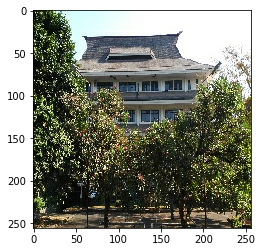

In [7]:
image = tf.io.read_file('VAL/FALSE/2.jpg') # Load image dari path
x = tf.image.decode_jpeg(image) # Decode image menjadi tensor RGB [0 - 255]
x = tf.image.convert_image_dtype(x, tf.float32) # Ini otomatis normalisasi nilai RGB (dibagi 255)
x = tf.image.resize(x, [256, 256]) # Resize image ke 256 256
x = tf.reshape(x, (1,) + x.shape) # Reshape image buat prediksi

probability = float(model.predict(x)) # Prediksi probabilitas gambar adalah Labtek VII
label = 'FALSE'
if probability >= 0.5:
  label = 'TRUE'

print(label + ' : %.2f' % (probability*100) + ' %')
plt.imshow(tf.squeeze(x, axis = 0))